# Processamento de Linguagem Natural aplicada à Gestão Pública

Aula 4 (08/06): Similaridade Textual

Cálculo de similaridade entre documentos e entre palavras. Análise de Semântica Latente. Outras formas de representação númérica de palavras.


In [ ]:
# Download dos dados
%%capture
!git clone https://github.com/samuelbarbosaa/oficina_nlp.git

In [ ]:
import pickle
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

plt.rcParams['figure.figsize'] = [10, 5]

In [ ]:
# Carrega textos já processados
with open('/content/oficina_nlp/data/textos_padronizados.pkl', 'rb') as fp:
  textos_proposicoes = pickle.load(fp)

textos_proposicoes

texto_padr  \
siglaTipoProjeto numero ano                                                       
PL               502    1999  projeto lei autorizar executivo criar concessã...   
                 2126   2002  projeto lei altera dispositivo lei dezembro co...   
                 2127   2002  projeto lei altera redação art lei dezembro di...   
                 120    2003  projeto lei projeto lei institui medalha mérit...   
                 1519   2004  projeto lei dispor gratuidade tranporte coleti...   
...                                                                         ...   
                 3614   2022  projeto lei autorizar executivo doar município...   
PEC              81     2022  proposta emenda constituição acrescentar art i...   
PL               3622   2022  projeto lei declara utilidade público institut...   
                 3624   2022  projeto lei denominação viaduto localizar alça...   
                 3625   2022  projeto lei autorizar executivo doar município...   

                                                                          texto  
siglaTipoProjeto numero ano                                                      
PL               502    1999  PROJETO DE LEI Nº 502/99 Autoriza o Poder Exec...  
                 2126   2002  PROJETO DE LEI Nº 2.126/2002 Altera dispositiv...  
                 2127   2002  PROJETO DE LEI Nº 2.127/2002 Altera a redação ...  
                 120    2003  PROJETO DE LEI Nº 120/2003 (EX-PROJETO DE LEI ...  
                 1519   2004  PROJETO DE LEI Nº 1.519/2004 Dispõe sobre a gr...  
...                                                                         ...  
                 3614   2022  # Projeto de Lei nº 3.614/2022\n\nAutoriza o P...  
PEC              81     2022  # Proposta de Emenda à Constituição nº 81/2022...  
PL               3622   2022  # Projeto de Lei nº 3.622/2022\n\nDeclara de u...  
                 3624   2022  # Projeto de Lei nº 3.624/2022\n\nDá denominaç...  
                 3625   2022  # Projeto de Lei nº 3.625/2022\n\nAutoriza o P...  

[4534 rows x 2 columns]

Matriz TF-IDF:

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

metodo = TfidfVectorizer()
modelo = metodo.fit(textos_proposicoes["texto_padr"])
TF_IDF = modelo.transform(textos_proposicoes["texto_padr"])
TF_IDF

<4534x31297 sparse matrix of type '<class 'numpy.float64'>'
	with 754323 stored elements in Compressed Sparse Row format>

# Similaridade Cosseno

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
SC = cosine_similarity(TF_IDF)

# Similaridade semântica

O cálculo da similaridade utilizando somente a matriz TF-IDF já apresenta bons resultados. Observe que quando aplicamos o método TF-IDF, porém, dois documentos são considerados similares somente quando contêm uma alta interseção de termos "relevantes" (com alta frequência no documento e baixa frequência nos demais documentos do *corpus*).

Observe porém, que as frases a seguir são muito similares com poucas palavras "relevantes" em comum:

*   A implantação de ecodutos possibilitam a segura transposição da **fauna**, sob ou sobre **rodovias**.
*   As empresas concessionárias de **estradas** em atividade no Estado de Minas Gerais devem realizar o resgate e a assistência de emergência a **animais** acidentados.

Isto é, as palavras não são idênticas, mas têm alta similiaridade semântica.
Gostaríamos de que essas sentenças tivessem um escore de similaridade alto, o que não acontece no método TF-IDF.

In [ ]:
print(textos_proposicoes.loc[('PL', 4182, 2017), "texto"][slice(0, 285)])

# Projeto de Lei nº 4.182/2017

Dispõe sobre a obrigação da empresas concessionárias de rodovias em atividade
no Estado de Minas Gerais de realizar o resgate e a assistência de emergência
de animais acidentados nas rodovias e estradas por ela administradas, e dá
outras providências.




In [ ]:
print(textos_proposicoes.loc[('PL', 78, 2019), "texto"][slice(0, 201)])

# Projeto de Lei Nº 78/2019

Dispõe sobre a implantação de ecodutos que possibilitem a segura transposição
da fauna, sob ou sobre estradas, rodovias e ferrovias no território do Estado
de Minas Gerais.


In [ ]:
idx_1 = textos_proposicoes.index.get_loc(('PL', 4182, 2017))
idx_2 = textos_proposicoes.index.get_loc(('PL', 78, 2019))

SC[idx_1, idx_2]

0.3619301206096633

Uma das forma de obter o resultado desejado é a aplicação de métodos estatísticos de [redução de dimensionalidade](https://en.wikipedia.org/wiki/Dimensionality_reduction), tais como PCA (*Principal Components Analysis*), NMF (*Non-negative Matrix Factorization*), SVD (*Singular Value Decomposition*), t-SNE, entre outros.

De maneira bem simplificada, estes métodos "condensam" as informações contidas em muitas dimensões (variáveis, colunas) em espaços de menor dimensão, reunindo informações de variáveis correlacionadas com o "objetivo" de preservar o maior volume de informação possível.


A imagem a seguir exemplifica a aplicação do método PCA (Principal Components Analysis):

![PCA](https://static.packt-cdn.com/products/9781789345070/graphics/assets/02ea50cd-5589-46e8-8bf3-388c3ed9c326.png)

Vamos aplicar um desses métodos (SVD) à matriz TF-IDF. Observe que a matriz TF-IDF tem 4.534 linhas (documentos) e 31.297 colunas (termos).

Vamos condensar essa matriz para que a resultante contenha somente 100 colunas (componentes).

In [ ]:
TF_IDF

<4534x31297 sparse matrix of type '<class 'numpy.float64'>'
	with 754323 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.decomposition import TruncatedSVD

tsvd = TruncatedSVD(n_components=100)
M_LSA = tsvd.fit_transform(TF_IDF)

In [ ]:
M_LSA.shape

(4534, 100)

Um dos resultados dessa operação é que convertemos uma matriz grande e *esparsa* (cuja maioria das entradas é igual a zero) em uma matriz menor e *densa* (cuja maioria das entradas é diferente de zero). Essa conversão oferece uma série de benefícios computacionais, tal como melhor cálculo de distância/similaridade e maior eficiência computacional.

In [ ]:
M_LSA[0:5, 0:5]

array([[ 0.19395561, -0.05804175,  0.04296635,  0.0100945 , -0.01962231],
       [ 0.20166658, -0.09652326,  0.01154285, -0.00808633, -0.05026228],
       [ 0.27635277, -0.11344124,  0.03779387,  0.01369016, -0.07950584],
       [ 0.14208982, -0.013853  , -0.00503159, -0.02562586, -0.02108537],
       [ 0.25927077, -0.10404378,  0.03728836, -0.06287375, -0.06632219]])

## Distância Euclidiana

In [ ]:
from sklearn.metrics.pairwise import euclidean_distances

E = euclidean_distances(M_LSA)
E.shape

(4534, 4534)

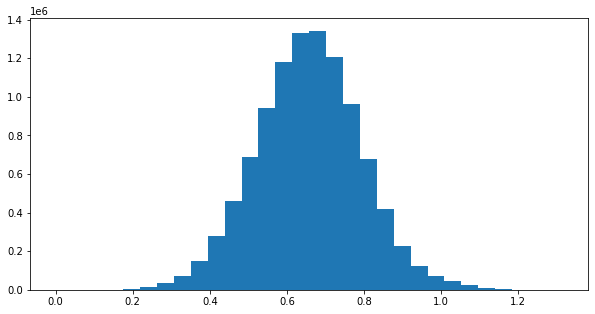

In [ ]:
upper_E = np.triu(E).flatten()
upper_E = upper_E[upper_E>0]
plt.hist(upper_E, bins=30)
plt.show()

Projetos similares apresentam distância relativamente baixa:

In [ ]:
E[idx_1, idx_2]

0.3354923171421084

Projetos não relacionados apresentam distância alta:

In [ ]:
E[3011, 3384]

0.9478357680744042

## Similaridade Cosseno

In [ ]:
W = cosine_similarity(M_LSA)

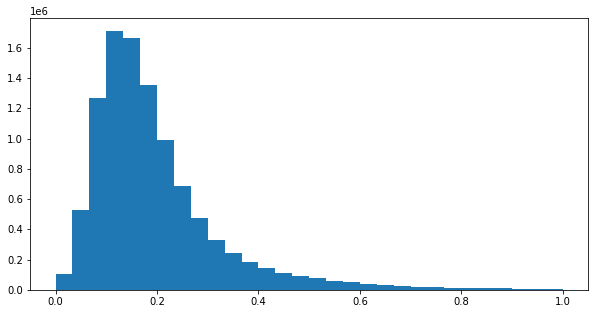

In [ ]:
upper_W = np.triu(W).flatten()
upper_W = upper_W[upper_W>0]
plt.hist(upper_W, bins=30)
plt.show()

Projetos semelhantes apresentam similaridade alta:

In [ ]:
W[idx_1, idx_2]

0.8553441258940645

Projetos não relacionados têm similaridade baixa:

In [ ]:
W[3011, 3384]

0.14180639234950754

# Visualização

Uma outra aplicação da redução de dimensionalidade é a possibilidade de visualizar as relações de proximidade entre os documentos.

Vamos aplicar o método t-SNE (*t-Distributed Stochastic Neighbor Embedding*) à matriz de análise semântica.

In [ ]:
import seaborn as sns
from sklearn.manifold import TSNE

In [ ]:
tsne = TSNE(init="pca", learning_rate="auto")
M_TSNE = tsne.fit_transform(M_LSA)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


In [ ]:
df = pd.DataFrame(M_TSNE, columns=['Y1', 'Y2'])
df['proposicao'] = [' '.join(map(str, x)) for x in textos_proposicoes.index.tolist()]
df['tipo'] = textos_proposicoes.index.get_level_values(0)

In [ ]:
import plotly.express as px
fig = px.scatter(df, x='Y1', y='Y2', color='tipo', hover_data=['proposicao'], width=800, height=500)
fig.show()

In [ ]:
def gerar_link_almg(tipo, numero, ano):
  return(f"https://www.almg.gov.br/atividade_parlamentar/tramitacao_projetos/texto.html?a={ano}&n={numero}&t={tipo}")

In [ ]:
gerar_link_almg("PL", 2006, 2015)

'https://www.almg.gov.br/atividade_parlamentar/tramitacao_projetos/texto.html?a=2015&n=2006&t=PL'

In [ ]:
gerar_link_almg("PL", 1702, 2020)

'https://www.almg.gov.br/atividade_parlamentar/tramitacao_projetos/texto.html?a=2020&n=1702&t=PL'

A visualização acima nos indica a possibilidade de outra aplicação estatística à matriz de análise semântica: os métodos de agrupamento (*clustering*).

# Outras aplicações estatísticas e de *machine learning*

## Agrupamento (*Clustering*)

De posse da matriz TF-IDF ou da matriz LSA, podemos aplicar métodos (não supervisionados) de agrupamento. Um deles é o agrupamento hierárquico:

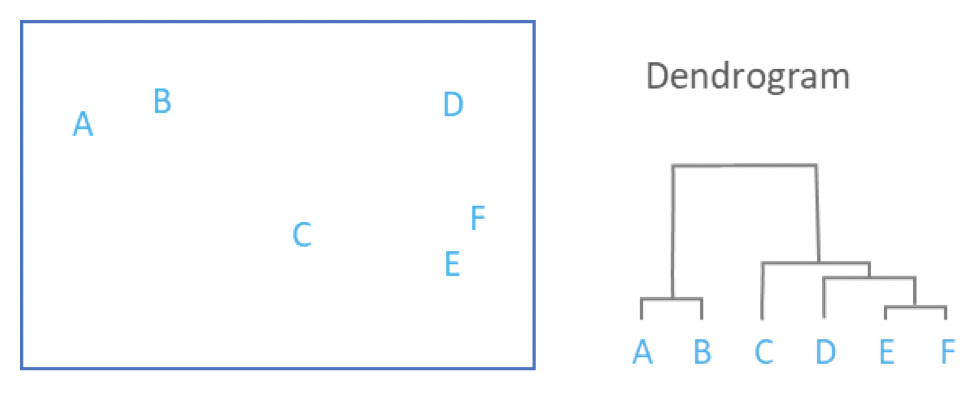

In [ ]:
from sklearn.cluster import AgglomerativeClustering

AC = AgglomerativeClustering(n_clusters=15)

In [ ]:
clustering = AC.fit(M_LSA)
clustering.labels_

array([ 2,  2,  4, ...,  9,  2, 12])

In [ ]:
clustering.labels_.shape

(4534,)

In [ ]:
textos_proposicoes["grupo"] = clustering.labels_
textos_proposicoes

texto_padr  \
siglaTipoProjeto numero ano                                                       
PL               502    1999  projeto lei autorizar executivo criar concessã...   
                 2126   2002  projeto lei altera dispositivo lei dezembro co...   
                 2127   2002  projeto lei altera redação art lei dezembro di...   
                 120    2003  projeto lei projeto lei institui medalha mérit...   
                 1519   2004  projeto lei dispor gratuidade tranporte coleti...   
...                                                                         ...   
                 3614   2022  projeto lei autorizar executivo doar município...   
PEC              81     2022  proposta emenda constituição acrescentar art i...   
PL               3622   2022  projeto lei declara utilidade público institut...   
                 3624   2022  projeto lei denominação viaduto localizar alça...   
                 3625   2022  projeto lei autorizar executivo doar município...   

                                                                          texto  \
siglaTipoProjeto numero ano                                                       
PL               502    1999  PROJETO DE LEI Nº 502/99 Autoriza o Poder Exec...   
                 2126   2002  PROJETO DE LEI Nº 2.126/2002 Altera dispositiv...   
                 2127   2002  PROJETO DE LEI Nº 2.127/2002 Altera a redação ...   
                 120    2003  PROJETO DE LEI Nº 120/2003 (EX-PROJETO DE LEI ...   
                 1519   2004  PROJETO DE LEI Nº 1.519/2004 Dispõe sobre a gr...   
...                                                                         ...   
                 3614   2022  # Projeto de Lei nº 3.614/2022\n\nAutoriza o P...   
PEC              81     2022  # Proposta de Emenda à Constituição nº 81/2022...   
PL               3622   2022  # Projeto de Lei nº 3.622/2022\n\nDeclara de u...   
                 3624   2022  # Projeto de Lei nº 3.624/2022\n\nDá denominaç...   
                 3625   2022  # Projeto de Lei nº 3.625/2022\n\nAutoriza o P...   

                              grupo  
siglaTipoProjeto numero ano          
PL               502    1999      2  
                 2126   2002      2  
                 2127   2002      4  
                 120    2003      2  
                 1519   2004      4  
...                             ...  
                 3614   2022     12  
PEC              81     2022     13  
PL               3622   2022      9  
                 3624   2022      2  
                 3625   2022     12  

[4534 rows x 3 columns]

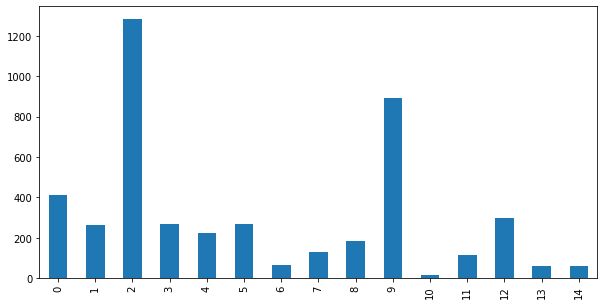

In [ ]:
textos_proposicoes["grupo"].value_counts().sort_index().plot.bar()
plt.show()

In [ ]:
df["grupo"] = pd.Series(textos_proposicoes["grupo"].values, dtype="category")
fig = px.scatter(df, x='Y1', y='Y2', color='grupo', hover_data=['proposicao'], width=800, height=500)
fig.show()

In [ ]:
gerar_link_almg("PL", 266, 2019)

'https://www.almg.gov.br/atividade_parlamentar/tramitacao_projetos/texto.html?a=2019&n=266&t=PL'

In [ ]:
gerar_link_almg("PL", 88, 2019)

'https://www.almg.gov.br/atividade_parlamentar/tramitacao_projetos/texto.html?a=2019&n=88&t=PL'

## Classificação

Quando temos pares de observações (variáveis preditoras e de resposta), podemos aplicar métodos supervisionados, dentre eles os métodos de classificação.

In [ ]:
textos_proposicoes

texto_padr  \
siglaTipoProjeto numero ano                                                       
PL               502    1999  projeto lei autorizar executivo criar concessã...   
                 2126   2002  projeto lei altera dispositivo lei dezembro co...   
                 2127   2002  projeto lei altera redação art lei dezembro di...   
                 120    2003  projeto lei projeto lei institui medalha mérit...   
                 1519   2004  projeto lei dispor gratuidade tranporte coleti...   
...                                                                         ...   
                 3614   2022  projeto lei autorizar executivo doar município...   
PEC              81     2022  proposta emenda constituição acrescentar art i...   
PL               3622   2022  projeto lei declara utilidade público institut...   
                 3624   2022  projeto lei denominação viaduto localizar alça...   
                 3625   2022  projeto lei autorizar executivo doar município...   

                                                                          texto  \
siglaTipoProjeto numero ano                                                       
PL               502    1999  PROJETO DE LEI Nº 502/99 Autoriza o Poder Exec...   
                 2126   2002  PROJETO DE LEI Nº 2.126/2002 Altera dispositiv...   
                 2127   2002  PROJETO DE LEI Nº 2.127/2002 Altera a redação ...   
                 120    2003  PROJETO DE LEI Nº 120/2003 (EX-PROJETO DE LEI ...   
                 1519   2004  PROJETO DE LEI Nº 1.519/2004 Dispõe sobre a gr...   
...                                                                         ...   
                 3614   2022  # Projeto de Lei nº 3.614/2022\n\nAutoriza o P...   
PEC              81     2022  # Proposta de Emenda à Constituição nº 81/2022...   
PL               3622   2022  # Projeto de Lei nº 3.622/2022\n\nDeclara de u...   
                 3624   2022  # Projeto de Lei nº 3.624/2022\n\nDá denominaç...   
                 3625   2022  # Projeto de Lei nº 3.625/2022\n\nAutoriza o P...   

                              grupo  
siglaTipoProjeto numero ano          
PL               502    1999      2  
                 2126   2002      2  
                 2127   2002      4  
                 120    2003      2  
                 1519   2004      4  
...                             ...  
                 3614   2022     12  
PEC              81     2022     13  
PL               3622   2022      9  
                 3624   2022      2  
                 3625   2022     12  

[4534 rows x 3 columns]

Uma das informações disponíveis para as proposições é o tema/assunto da proposição. Podemos utilizar os vetores da matriz LSA como variáveis preditoras para ajustar um modelo de classificação (exemplo: Regressão Logística Multinomial).

Um modelo dessa natureza poderia ser utilizado, por exemplo, para determinar automaticamente os temas de novas proposições nos casos em que o modelo retornar probabilidade alta, deixando para revisão humana somente os textos cuja classificação do modelo apresenta baixa credibilidade.

# Similaridade entre termos

Lembre-se que a Matriz TF-IDF é uma matriz de *documentos* (linhas) e *termos* (colunas). O método que aplicamos na última seção nos permitiu calcular distâncias entre os documentos.

Se aplicarmos o mesmo método à *transposta* da Matriz TF-IDF, temos uma forma de calcular a similaridade entre os termos.

In [ ]:
TF_IDF_T = TF_IDF.T
TF_IDF_T

<31297x4534 sparse matrix of type '<class 'numpy.float64'>'
	with 754323 stored elements in Compressed Sparse Column format>

In [ ]:
tsvd = TruncatedSVD(n_components=20)
termos_LSA = tsvd.fit_transform(TF_IDF_T)
termos_LSA.shape

(31297, 20)

In [ ]:
SC_termos = cosine_similarity(termos_LSA)

In [ ]:
tokens = modelo.get_feature_names_out()

In [ ]:
def retornar_palavras_mais_proximas(termo, n):
  idx_token = tokens.tolist().index(termo)
  S = SC_termos[idx_token,:]                            # Extrai a linha referente ao documento indicado
  termos_proximos = np.argpartition(S, -n)[-n:]             # Identifica o índice dos n documentos mais próximos
  print(f"Termo indicado: {termo}")
  print("Temos mais similares:")
  return tokens[termos_proximos]

In [ ]:
retornar_palavras_mais_proximas("médico", 5)

Termo indicado: médico
Temos mais similares:


array(['laboratorial', 'paciente', 'internar', 'médico', 'clínico'],
      dtype=object)

In [ ]:
retornar_palavras_mais_proximas("munição", 5)

Termo indicado: munição
Temos mais similares:


array(['destruídas', 'arma', 'restir', 'bala', 'munição'], dtype=object)

In [ ]:
retornar_palavras_mais_proximas("coelho", 5)

Termo indicado: coelho
Temos mais similares:


array(['pacheco', 'pinto', 'fernando', 'coelho', 'betinho'], dtype=object)

### Visualização

In [ ]:
#tsne_termos = TSNE(init="pca", learning_rate="auto")
#YT = tsne_termos.fit_transform(termos_LSA)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning:

The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.



In [ ]:
#with open('/content/oficina_nlp/data/tsne_termos.pkl', 'wb') as fp:
#  pickle.dump(YT, fp)

In [ ]:
with open('/content/oficina_nlp/data/tsne_termos.pkl', 'rb') as fp:
  YT = pickle.load(fp)

In [ ]:
ytdf = pd.DataFrame(YT, columns=["Y1", "Y2"])
ytdf["termo"] = tokens

In [ ]:
ytdf.iloc[[50, 1000, 10000, 15000, 20000, 25000], :]

,Y1,Y2,termo
50,-83.170494,-37.644283,abasteça
1000,-33.925709,0.653607,agrofit
10000,-70.747726,66.608078,dilema
15000,40.925621,-87.895004,harmoniosamente
20000,43.064629,16.260530,monitor
25000,-15.777070,-30.588436,recebem


In [ ]:
destaques = ["médico", "arma", "fazenda", "estudante", "café"]
cores = [x in destaques for x in tokens.tolist()]

In [ ]:
fig = px.scatter(ytdf, x='Y1', y='Y2', hover_data=['termo'], width=800, height=500, color=cores)
fig.show()